In [1]:
import pandas as pd

import numpy as np

from datetime import datetime

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sn



In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 10000)
sn.set(style='darkgrid')

In [3]:
data_path = r'C:\Windows\System32\applied_data_science_-_covid-19\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv'

pd_raw = pd.read_csv(data_path)

In [4]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [5]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20', '9/9/20', '9/10/20',
       '9/11/20', '9/12/20', '9/13/20'],
      dtype='object', length=236)

In [6]:
time_idx = pd_raw.columns[4:]

In [7]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [8]:
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [9]:
len(pd_raw['Country/Region'].unique())

188

In [10]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [11]:
pd_raw[pd_raw['Country/Region'] == "US"].iloc[:,4::]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
242,1,1,2,2,5,5,5,5,5,7,...,6200518,6244970,6276365,6300622,6327009,6360212,6396100,6443652,6485123,6519573


In [12]:
pd_raw[pd_raw['Country/Region'] == "US"].iloc[:,4::].sum(axis=0)

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
1/27/20          5
1/28/20          5
1/29/20          5
1/30/20          5
1/31/20          7
2/1/20           8
2/2/20           8
2/3/20          11
2/4/20          11
2/5/20          11
2/6/20          11
2/7/20          11
2/8/20          11
2/9/20          11
2/10/20         11
2/11/20         12
2/12/20         12
2/13/20         13
2/14/20         13
2/15/20         13
2/16/20         13
2/17/20         13
2/18/20         13
2/19/20         13
2/20/20         13
2/21/20         15
2/22/20         15
2/23/20         15
2/24/20         15
2/25/20         15
2/26/20         15
2/27/20         16
2/28/20         16
2/29/20         24
3/1/20          30
3/2/20          52
3/3/20          72
3/4/20         103
3/5/20         172
3/6/20         215
3/7/20         337
3/8/20         450
3/9/20         515
3/10/20        713
3/11/20       1105
3/12/20       1530
3/13/20       2115
3/14/20     

In [13]:
pd_raw[pd_raw['Country/Region'] == "Germany"].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [14]:
country_list = ['Italy',
               'US',
               'Spain',
               'Germany',
               'India',
               'Korea, South',
               ]

In [15]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region'] == each].iloc[:,4::].sum(axis=0))

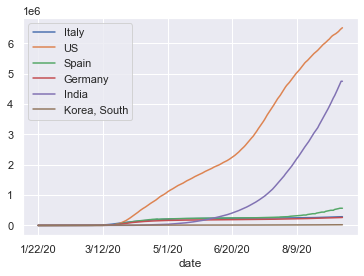

In [16]:
%matplotlib inline
df_plot.set_index('date').plot()

In [17]:
df_plot.head()

,date,Italy,US,Spain,Germany,India,"Korea, South"
0,1/22/20,0,1,0,0,0,1
1,1/23/20,0,1,0,0,0,1
2,1/24/20,0,2,0,0,0,2
3,1/25/20,0,2,0,0,0,2
4,1/26/20,0,5,0,0,0,3


In [18]:
from datetime import datetime

In [19]:
df_plot.date[0]

'1/22/20'

In [20]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [21]:
time_idx = [datetime.strptime( each,"%m/%d/%y") for each in df_plot.date]
time_idx[0:5]

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [22]:
time_str=[each.strftime('%y-%m-%d') for each in time_idx]
time_str[0:5]

['20-01-22', '20-01-23', '20-01-24', '20-01-25', '20-01-26']

In [23]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
df_plot.head()

,date,Italy,US,Spain,Germany,India,"Korea, South"
0,2020-01-22,0,1,0,0,0,1
1,2020-01-23,0,1,0,0,0,1
2,2020-01-24,0,2,0,0,0,2
3,2020-01-25,0,2,0,0,0,2
4,2020-01-26,0,5,0,0,0,3


In [25]:
#Saving processed file to pipeline
df_plot.to_csv(r'C:\Windows\System32\applied_data_science_-_covid-19\data\processed\COVID_small_flat_table.csv',sep = ';', index=False)

In [26]:
# this is my original Raw data now we change this according to our requirements..

data_path = r'C:\Windows\System32\applied_data_science_-_covid-19\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv'

pd_raw = pd.read_csv(data_path)


pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [27]:
#Rename the colomuns according to my flexibility
pd_data_base = pd_raw.rename(columns={'Country/Region':'country',
                                     'Province/State':'state'})

In [28]:
# to drop some columns -cutting
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)

In [29]:
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,0,0,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [30]:
#i am setting here the index(for reference) to sate & country--because when i want to combine some data from different csv files i can make it by this reference state or countries!!  

pd_data_base.set_index(['state','country']).T


state           NaN                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   
1/27/20           0       0       0       0      0                   0   
1/28/20           0       0       0       0      0                   0   
1/29/20           0       0       0       0      0                   0   
1/30/20           0       0       0       0      0                   0   
1/31/20           0       0       0       0      0                   0   
2/1/20            0       0       0       0      0                   0   
2/2/20            0       0       0       0      0                   0   
2/3/20            0       0       0       0      0                   0   
2/4/20            0       0       0       0      0                   0   
2/5/20            0       0       0       0      0                   0   
2/6/20            0       0       0       0      0                   0   
2/7/20            0       0       0       0      0                   0   
2/8/20            0       0       0       0      0                   0   
2/9/20            0       0       0       0      0                   0   
2/10/20           0       0       0       0      0                   0   
2/11/20           0       0       0       0      0                   0   
2/12/20           0       0       0       0      0                   0   
2/13/20           0       0       0       0      0                   0   
2/14/20           0       0       0       0      0                   0   
2/15/20           0       0       0       0      0                   0   
2/16/20           0       0       0       0      0                   0   
2/17/20           0       0       0       0      0                   0   
2/18/20           0       0       0       0      0                   0   
2/19/20           0       0       0       0      0                   0   
2/20/20           0       0       0       0      0                   0   
2/21/20           0       0       0       0      0                   0   
2/22/20           0       0       0       0      0                   0   
2/23/20           0       0       0       0      0                   0   
2/24/20           1       0       0       0      0                   0   
2/25/20           1       0       1       0      0                   0   
2/26/20           1       0       1       0      0                   0   
2/27/20           1       0       1       0      0                   0   
2/28/20           1       0       1       0      0                   0   
2/29/20           1       0       1       0      0                   0   
3/1/20            1       0       1       0      0                   0   
3/2/20            1       0       3       1      0                   0   
3/3/20            1       0       5       1      0                   0   
3/4/20            1       0      12       1      0                   0   
3/5/20            1       0      12       1      0                   0   
3/6/20            1       0      17       1      0                   0   
3/7/20            1       0      17       1      0                   0   
3/8/20            4       0      19       1      0                   0   
3/9/20            4       2      20       1      0                   0   
3/10/20           5      10      20       1      0                   0   
3/11/20           7      12      20       1      0                   0   
3/12/20           7      23      24       1      0                   0   
3/13/20           7      33      26       1      0                   1   
3/14

In [31]:
# i saved this in test_pd

test_pd=pd_data_base.set_index(['state','country']).T

In [32]:
test_pd.columns

MultiIndex([(                           nan,         'Afghanistan'),
            (                           nan,             'Albania'),
            (                           nan,             'Algeria'),
            (                           nan,             'Andorra'),
            (                           nan,              'Angola'),
            (                           nan, 'Antigua and Barbuda'),
            (                           nan,           'Argentina'),
            (                           nan,             'Armenia'),
            ('Australian Capital Territory',           'Australia'),
            (             'New South Wales',           'Australia'),
            ...
            (                           nan,      'United Kingdom'),
            (                           nan,             'Uruguay'),
            (                           nan,          'Uzbekistan'),
            (                           nan,           'Venezuela'),
            (     

In [33]:
# here we used command "stack" to arrange data in order--for moere clearness compare up data and down data how arranged in order 
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
106667,9/13/20,Zhejiang,West Bank and Gaza,30574.0
106668,9/13/20,Zhejiang,Western Sahara,10.0
106669,9/13/20,Zhejiang,Yemen,2011.0
106670,9/13/20,Zhejiang,Zambia,13539.0


In [34]:
# here nothing we have done we have combined all the up comands in one line and set to relational data observe carefully

pd_relational_model=pd_data_base.set_index(['state','country']) \
.T \
.stack(level=[0,1]) \
.reset_index() \
.rename(columns={'level_0':'date',
                0: 'confirmed'},
       )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [35]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [36]:
# we have converted date type from object to datetime64[ns]
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [37]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [38]:
#Saving processed file to pipeline
df_plot.to_csv(r'C:\Windows\System32\applied_data_science_-_covid-19\data\processed\COVID_relational_confirmed.csv',sep = ';')

In [39]:
#Saving processed file to pipeline
df_plot=pd.read_csv(r'C:\Windows\System32\applied_data_science_-_covid-19\data\processed\COVID_small_flat_table.csv',sep = ';')

In [40]:
df_plot.head()

,date,Italy,US,Spain,Germany,India,"Korea, South"
0,2020-01-22,0,1,0,0,0,1
1,2020-01-23,0,1,0,0,0,1
2,2020-01-24,0,2,0,0,0,2
3,2020-01-25,0,2,0,0,0,2
4,2020-01-26,0,5,0,0,0,3


<Figure size 432x288 with 0 Axes>

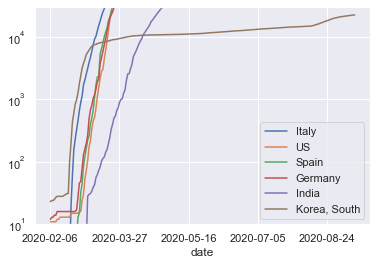

In [41]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 30000)
ax.set_yscale('log')


In [42]:
import plotly
plotly.__version__

'4.9.0'

In [43]:
import plotly.graph_objects as go

In [44]:
fig = go.Figure()
import webbrowser

In [ ]:

for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                        y=df_plot[each],
                        mode='markers+lines',
                        name=each
                        )
             )


fig.update_layout(
width=900,
height=600,
xaxis_title="Time",
yaxis_title="Confirmed infected people (source from johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])



fig.update_layout(xaxis_rangeslider_visible=True)

fig.show(renderer='browser')



In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app= dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig, id='main_window_slope')
])
  

In [ ]:
app.run_server(debug=True, use_reloader=False)